In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import re
import os
from cmdstanpy import cmdstan_path, CmdStanModel
import matplotlib.pyplot as plt
import stan_helpers as sh
import importlib as imp
import seaborn.objects as so
from seaborn import axes_style


# Load and massage Data

In [6]:
dgrpall=pd.read_csv('DGRPsummerall.csv')
dgrpall

,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,n_Week1Day3,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,1,1,1,45,1,54,0.509434,610.0,0.316913,34.0,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,2,45,1,873,0.321101,217.0,0.601852,3.0,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,1,1,3,45,1,196,0.635897,686.0,0.400000,15.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,1,1,4,45,1,3,0.500000,257.0,0.378906,46.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,1,1,5,45,1,0,NaN,726.0,0.388966,1.0,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,5,2,92,819,0,343,0.654971,158.0,0.477707,NaN,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1244,5,2,93,819,0,281,0.435714,31.0,0.566667,NaN,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1245,5,2,94,819,0,126,0.328000,395.0,0.428934,NaN,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1246,5,2,95,819,0,472,0.585987,363.0,0.651934,NaN,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
skt=dgrpall[dgrpall['LineNumber']!=0]
skt=skt.reset_index(drop=True).reset_index()
skt=skt.rename(columns={'index':"uID"})
skt

,uID,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,n_Week1Day1,rBias_Week1Day1,n_Week1Day2,rBias_Week1Day2,...,n_Week2Day2,rBias_Week2Day2,n_Week2Day3,rBias_Week2Day3,n_Week3Day1,rBias_Week3Day1,n_Week3Day2,rBias_Week3Day2,n_Week3Day3,rBias_Week3Day3
0,0,1,1,1,45,1,54,0.509434,610.0,0.316913,...,774.0,0.495472,387.0,0.383420,741.0,0.535135,NaN,NaN,-1.0,NaN
1,1,1,1,2,45,1,873,0.321101,217.0,0.601852,...,452.0,0.308204,197.0,0.535714,-1.0,NaN,NaN,NaN,-1.0,NaN
2,2,1,1,3,45,1,196,0.635897,686.0,0.400000,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
3,3,1,1,4,45,1,3,0.500000,257.0,0.378906,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
4,4,1,1,5,45,1,0,NaN,726.0,0.388966,...,-1.0,NaN,-1.0,NaN,-1.0,NaN,NaN,NaN,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188,1188,5,2,92,819,0,343,0.654971,158.0,0.477707,...,326.0,0.646154,212.0,0.545024,NaN,NaN,NaN,NaN,NaN,NaN
1189,1189,5,2,93,819,0,281,0.435714,31.0,0.566667,...,209.0,0.389423,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,1190,5,2,94,819,0,126,0.328000,395.0,0.428934,...,562.0,0.556150,328.0,0.425076,NaN,NaN,NaN,NaN,NaN,NaN
1191,1191,5,2,95,819,0,472,0.585987,363.0,0.651934,...,243.0,0.504132,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
skt_melted=skt.iloc[:,0:23].melt(id_vars=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID"])
skt_melted['Day']=pd.Series(np.zeros(skt_melted.shape[0]))
skt_melted['Variable']=pd.Series(np.zeros(skt_melted.shape[0]))
dayreg=re.compile('Day([0-9]+)')
weekreg=re.compile('Week([0-9]+)')
# varreg=
for row in np.arange(skt_melted.shape[0]):
  # print(row)
  day=dayreg.search(skt_melted.iloc[row]['variable']).group(1)
  week=weekreg.search(skt_melted.iloc[row]['variable']).group(1)
  skt_melted.iloc[row, 8]=int(int(day)+(int(week)-1)*7)-1
  skt_melted.iloc[row,9]=str(skt_melted.iloc[row,6])[0]
  # print(day.group(1))
skt_melted=skt_melted.drop(columns=['variable'])
skt_unmelted=skt_melted.pivot(index=["BatchNumber", "TrayNumber", "FlyID", "LineNumber", "Sex", "uID", "Day"], columns="Variable", values="value")
skt_unmelted['x']=(skt_unmelted['n']-1)*skt_unmelted['r']
skt_unmelted=skt_unmelted.reset_index()
skt_unmelted_obs=skt_unmelted.dropna(axis="index")
skt_unmelted_obs

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
2,1,1,1,45,1,0,2.0,34.0,0.575758,19.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
...,...,...,...,...,...,...,...,...,...,...
10728,5,2,96,819,0,1192,0.0,39.0,0.552632,21.0
10729,5,2,96,819,0,1192,1.0,133.0,0.560606,74.0
10731,5,2,96,819,0,1192,7.0,438.0,0.519451,227.0
10732,5,2,96,819,0,1192,8.0,356.0,0.628169,223.0


In [9]:
skt_unmelted_mis=skt_unmelted[skt_unmelted.isna().any(axis=1)]
skt_unmelted_mis

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
7,1,1,1,45,1,0,15.0,NaN,NaN,NaN
8,1,1,1,45,1,0,16.0,-1.0,NaN,NaN
15,1,1,2,45,1,1,14.0,-1.0,NaN,NaN
16,1,1,2,45,1,1,15.0,NaN,NaN,NaN
17,1,1,2,45,1,1,16.0,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10727,5,2,95,819,0,1191,16.0,NaN,NaN,NaN
10730,5,2,96,819,0,1192,2.0,NaN,NaN,NaN
10734,5,2,96,819,0,1192,14.0,NaN,NaN,NaN
10735,5,2,96,819,0,1192,15.0,NaN,NaN,NaN


In [10]:
#STAN requires missing days to be explicitly enumerated, including the days where no measurements are taken.

skt_unmelted_mis_b=skt_unmelted_mis
dummyrow=skt_unmelted_mis.iloc[0,:]
dummyrow
actualdays=np.unique(skt_unmelted_obs["Day"])
fullrange=np.arange(0,np.max(actualdays))
for ii, i in enumerate(actualdays):
  for jj, j in enumerate(fullrange):
    if j==i:
      # print(j)
      # print(i)
      fullrange[jj]=np.nan


missingdays=np.array(pd.Series(fullrange).dropna(), dtype=int)

np.unique(skt_unmelted_obs["Day"])
for i in range(skt.shape[0]):
  dummyrownew=dummyrow.copy()
  dummyrownew.loc['uID']=int(i)
  for j in missingdays:
    dummyrownew.loc['Day']=int(j)
    skt_unmelted_mis_b=pd.concat([skt_unmelted_mis_b, pd.DataFrame(dummyrownew).T])
    # skt_unmelted_mis_b.append(dummyrow)

In [11]:
#Making a dictionary for STAN
dgrp_data_sk_alld={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}

In [12]:
dgrp_data_sk_alld

{'N': 1193,
 'S': 12,
 'T': 17,
 's': array([1, 1, 1, ..., 9, 9, 9], dtype=int8),
 'fly_i_obs': array([   1,    1,    1, ..., 1193, 1193, 1193]),
 'time_i_obs': array([ 1,  2,  3, ...,  8,  9, 10]),
 't_obs': 5340,
 'x_obs': array([ 27, 193,  19, ..., 227, 222, 115]),
 'n_obs': array([ 54, 610,  34, ..., 438, 356, 231]),
 'fly_i_mis': array([   1,    1,    2, ..., 1193, 1193, 1193]),
 'time_i_mis': array([16, 17, 15, ..., 12, 13, 14]),
 't_mis': 14941}

# Looking at all data points

In [13]:
skt_unmelted["LineNumber"]=pd.Categorical(skt_unmelted["LineNumber"])
n_thresh=skt_unmelted["n"]>50
skt_unmelted=skt_unmelted[n_thresh]
skt_unmelted

Variable,BatchNumber,TrayNumber,FlyID,LineNumber,Sex,uID,Day,n,r,x
0,1,1,1,45,1,0,0.0,54.0,0.509434,27.0
1,1,1,1,45,1,0,1.0,610.0,0.316913,193.0
3,1,1,1,45,1,0,7.0,544.0,0.364641,198.0
4,1,1,1,45,1,0,8.0,774.0,0.495472,383.0
5,1,1,1,45,1,0,9.0,387.0,0.383420,148.0
...,...,...,...,...,...,...,...,...,...,...
10723,5,2,95,819,0,1191,8.0,243.0,0.504132,122.0
10729,5,2,96,819,0,1192,1.0,133.0,0.560606,74.0
10731,5,2,96,819,0,1192,7.0,438.0,0.519451,227.0
10732,5,2,96,819,0,1192,8.0,356.0,0.628169,223.0


In [14]:
# r_std=skt_unmelted.groupby(["LineNumber","Day"]).std()['r']
# r_mean=skt_unmelted.groupby(["LineNumber","Day"]).mean()['r']
r_count=skt_unmelted[["r", "uID", "LineNumber"]].groupby(["uID", "LineNumber"]).count()

r_count[r_count["r"]>1]

,Variable,r
uID,LineNumber,
0,45,6
1,45,5
2,45,2
3,45,2
5,45,2
...,...,...
1188,819,5
1189,819,3
1190,819,5


In [15]:

r_std=skt_unmelted[["r", "uID", "LineNumber"]].groupby(["uID", "LineNumber"]).std()
r_std=r_std.reset_index()
~pd.isna(r_std["r"])


0         True
1        False
2        False
3        False
4        False
         ...  
11395    False
11396    False
11397    False
11398     True
11399    False
Name: r, Length: 11400, dtype: bool

In [16]:
r_mean=skt_unmelted[["r", "uID", "LineNumber"]].groupby(["uID", "LineNumber"]).mean()
r_mean=r_mean.reset_index()
r_max=skt_unmelted[["r", "uID", "LineNumber"]].groupby(["uID", "LineNumber"]).max()
r_max=r_max.reset_index()
r_min=skt_unmelted[["r", "uID", "LineNumber"]].groupby(["uID", "LineNumber"]).min()
r_min=r_min.reset_index()
r_trunc=r_mean[~pd.isna(r_std["r"])]
r_trunc["r_std"]=r_std[~pd.isna(r_std["r"])]["r"]
r_trunc["r_mean"]=r_trunc["r"]
r_trunc["r_min"]=r_min[~pd.isna(r_std["r"])]["r"]
r_trunc["r_max"]=r_max[~pd.isna(r_std["r"])]["r"]
r_trunc["r_range"]=r_trunc["r_max"]-r_trunc["r_min"]
r_trunc

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_76839/1629177128.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_trunc["r_std"]=r_std[~pd.isna(r_std["r"])]["r"]
/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_76839/1629177128.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  r_trunc["r_mean"]=r_trunc["r"]
/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_76839/1629177128.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


Variable,uID,LineNumber,r,r_std,r_mean,r_min,r_max,r_range
0,0,45,0.434169,0.090306,0.434169,0.316913,0.535135,0.218222
10,1,45,0.451761,0.131216,0.451761,0.308204,0.601852,0.293648
20,2,45,0.517949,0.166805,0.517949,0.400000,0.635897,0.235897
30,3,45,0.445453,0.094111,0.445453,0.378906,0.512000,0.133094
50,5,45,0.328620,0.212009,0.328620,0.178707,0.478533,0.299826
...,...,...,...,...,...,...,...,...
11358,1188,819,0.589080,0.075825,0.589080,0.477707,0.654971,0.177264
11368,1189,819,0.402310,0.029180,0.402310,0.381791,0.435714,0.053923
11378,1190,819,0.475632,0.122507,0.475632,0.328000,0.640000,0.312000
11388,1191,819,0.570692,0.063673,0.570692,0.504132,0.651934,0.147801


In [17]:
# byfly=skt_unmelted.groupby(["uID", "LineNumber"]).mean()
# byfly["r_mean"]=r_mean
# byfly["r_std"]=r_std
# byfly

ValueError: Cannot set a DataFrame with multiple columns to the single column r_mean

In [18]:
byfly

Variable         BatchNumber  TrayNumber  FlyID  Sex   Day           n  \
uID  LineNumber                                                          
0    45                  1.0         1.0    1.0  1.0  6.50  518.333333   
     85                  NaN         NaN    NaN  NaN   NaN         NaN   
     105                 NaN         NaN    NaN  NaN   NaN         NaN   
     208                 NaN         NaN    NaN  NaN   NaN         NaN   
     426                 NaN         NaN    NaN  NaN   NaN         NaN   
...                      ...         ...    ...  ...   ...         ...   
1192 535                 NaN         NaN    NaN  NaN   NaN         NaN   
     703                 NaN         NaN    NaN  NaN   NaN         NaN   
     796                 NaN         NaN    NaN  NaN   NaN         NaN   
     819                 5.0         2.0   96.0  0.0  6.25  289.500000   
     907                 NaN         NaN    NaN  NaN   NaN         NaN   

Variable                r           x  
uID  LineNumber                        
0    45          0.434169  224.166667  
     85               NaN         NaN  
     105              NaN         NaN  
     208              NaN         NaN  
     426              NaN         NaN  
...                   ...         ...  
1192 535              NaN         NaN  
     703              NaN         NaN  
     796              NaN         NaN  
     819         0.552056  159.750000  
     907              NaN         NaN  

[11400 rows x 8 columns]

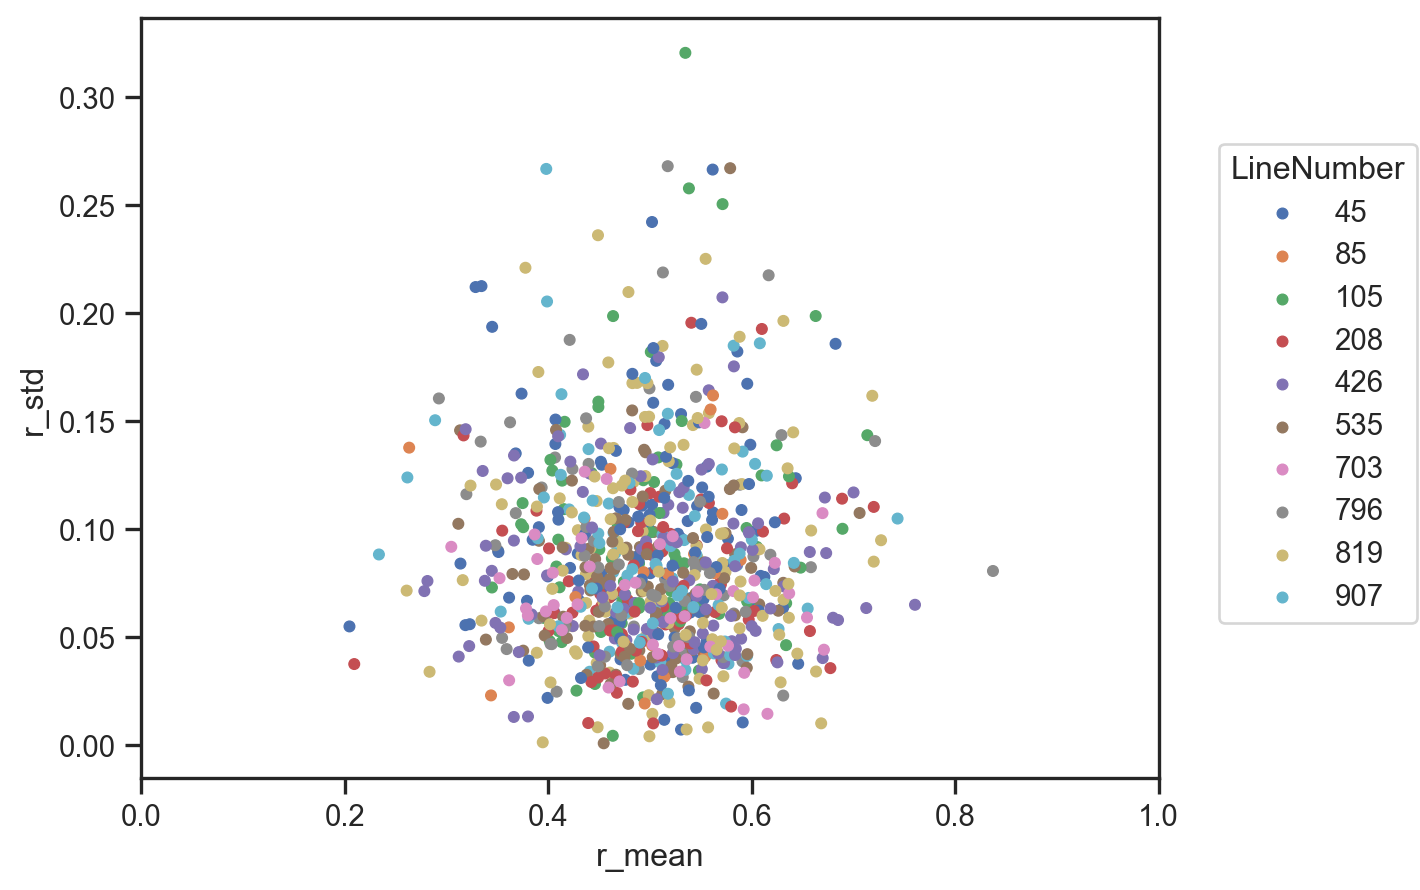

In [19]:
from seaborn import axes_style

# so.Plot.config.theme.update(axes_style("whitegrid"))
rp=so.Plot(data=r_trunc, x="r_mean", y="r_std", color="LineNumber").add(so.Dot(pointsize=4)).limit(x=(0, 1))
# sns.set_style("whitegrid")
# rp.label(y="Standard Deviation of rBias")
# rp.label
rp=rp.theme({"axes.facecolor": "w", "axes.edgecolor": "black"}).theme(axes_style("ticks"))
rp.save("F1F2rmeanrstd.pdf")

/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/ipykernel_76839/3320004987.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  allDGRP=sns.lineplot(skt_unmelted[n_thresh], x="Day", y="r", hue="LineNumber", units="uID", linewidth=.1, estimator=None)


<Axes: xlabel='Day', ylabel='r'>

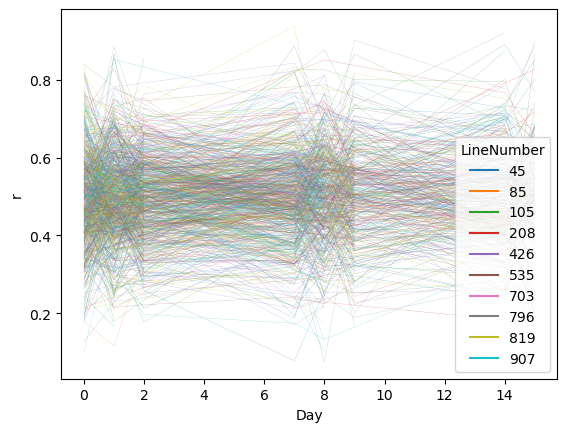

In [64]:
# sns.lineplot(skt_unmelted, x="Day", y="r", hue="LineNumber")
allDGRP=sns.lineplot(skt_unmelted[n_thresh], x="Day", y="r", hue="LineNumber", units="uID", linewidth=.1, estimator=None) 
allDGRP

# Run STAN Code

In [20]:
modelname="dmodel6_AR_transformed"
if os.path.exists(modelname):
  os.remove(modelname)

stan_file=modelname+".stan"

model_AR = CmdStanModel(stan_file=stan_file)


16:48:27 - cmdstanpy - INFO - compiling stan file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed.stan to exe file /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed
16:48:36 - cmdstanpy - INFO - compiled model executable: /Users/ryanmaloney/Documents/GitHub/DGRP experiments/dmodel6_AR_transformed


In [21]:

dgrp_data_sk_m6={
  "N": skt.shape[0], #Total number of flies
  "S": np.unique(skt_unmelted_obs["LineNumber"]).shape[0]+2, #Total number of Lines
  
  "T": int(np.array(skt_unmelted_obs["Day"]).max()+2), #Total number of Days. Changed this to 2 as hack, but I forget why (1 is because stan is 1 indexing). Maybe unmelted mis is higher?
  "s": pd.Categorical(skt["LineNumber"]).codes+1, # list of line number per fly
  "fly_i_obs": np.array(skt_unmelted_obs["uID"])+1, # indexes of fly number for flattened observations
  "time_i_obs": np.array(skt_unmelted_obs["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_obs": skt_unmelted_obs['n'].shape[0], # total number of observed trials
  "x_obs": np.array(skt_unmelted_obs['x'], dtype=int), # flattened array with number of right turns for each obs
  "n_obs": np.array(skt_unmelted_obs['n'], dtype=int), # flattened array with number of total turns for each obs
  "fly_i_mis": np.array(skt_unmelted_mis_b["uID"], dtype=int)+1, # indexes of fly number for flattened observations
  "time_i_mis": np.array(skt_unmelted_mis_b["Day"], dtype=int)+1, # indexes of fly number for flattened observations
  "t_mis": skt_unmelted_mis_b['n'].shape[0] # total number of observed trials
  # "x_mis": np.array(skt_unmelted['x'], dtype=int), # flattened array with number of right turns for each obs
  # "n_mis": np.array(skt_unmelted['n'], dtype=int) # flattened array with number of total turns for each obs
}
# fit = model2.sample(data=dgrp_data_sk_m6,
#  show_console=True,
#   iter_sampling=1000)

In [23]:
fit3 = model_AR.sample(data=dgrp_data_sk_m6,
#  show_console=True,
  iter_sampling=2000)

16:48:49 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

16:53:44 - cmdstanpy - INFO - CmdStan done processing.
16:53:44 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmplq1uu70b/tmp4tcq90_1.stan', line 78, column 10 to column 51)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmplq1uu70b/tmp4tcq90_1.stan', line 78, column 10 to column 51)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmplq1uu70b/tmp4tcq90_1.stan', line 74, column 8 to column 34)
	Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmplq1uu70b/tmp4tcq90_1.stan', line 78, column 10 to column 51)
Exception: normal_lpdf: Scale parameter is 0, but must be positive! (in '/var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmplq1uu70b

In [18]:
fitar=fit3

In [19]:
pd.Categorical(skt["LineNumber"]).categories

Int64Index([45, 85, 105, 208, 426, 535, 703, 796, 819, 907], dtype='int64')

In [24]:
print(fit3.diagnose())

Processing csv files: /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmph01cr4jx/dmodel6_AR_transformed9rfsst74/dmodel6_AR_transformed-20240506164849_1.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmph01cr4jx/dmodel6_AR_transformed9rfsst74/dmodel6_AR_transformed-20240506164849_2.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmph01cr4jx/dmodel6_AR_transformed9rfsst74/dmodel6_AR_transformed-20240506164849_3.csv, /var/folders/s_/7_g1r1fs2wdcxn113q39_gzw0000gn/T/tmph01cr4jx/dmodel6_AR_transformed9rfsst74/dmodel6_AR_transformed-20240506164849_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
The E-BFMI, 0.27, is below the nominal threshold of 0.30 which suggests that HMC may have trouble exploring the target distribution.
If possible, try to reparameterize the model.

Effective sample size sati

/Users/ryanmaloney/miniforge3/envs/cmdstan/lib/python3.10/site-packages/seaborn/distributions.py:1185: UserWarning: The following kwargs were not used by contour: 'xlim'
  cset = contour_func(


(0.0, 1.0)

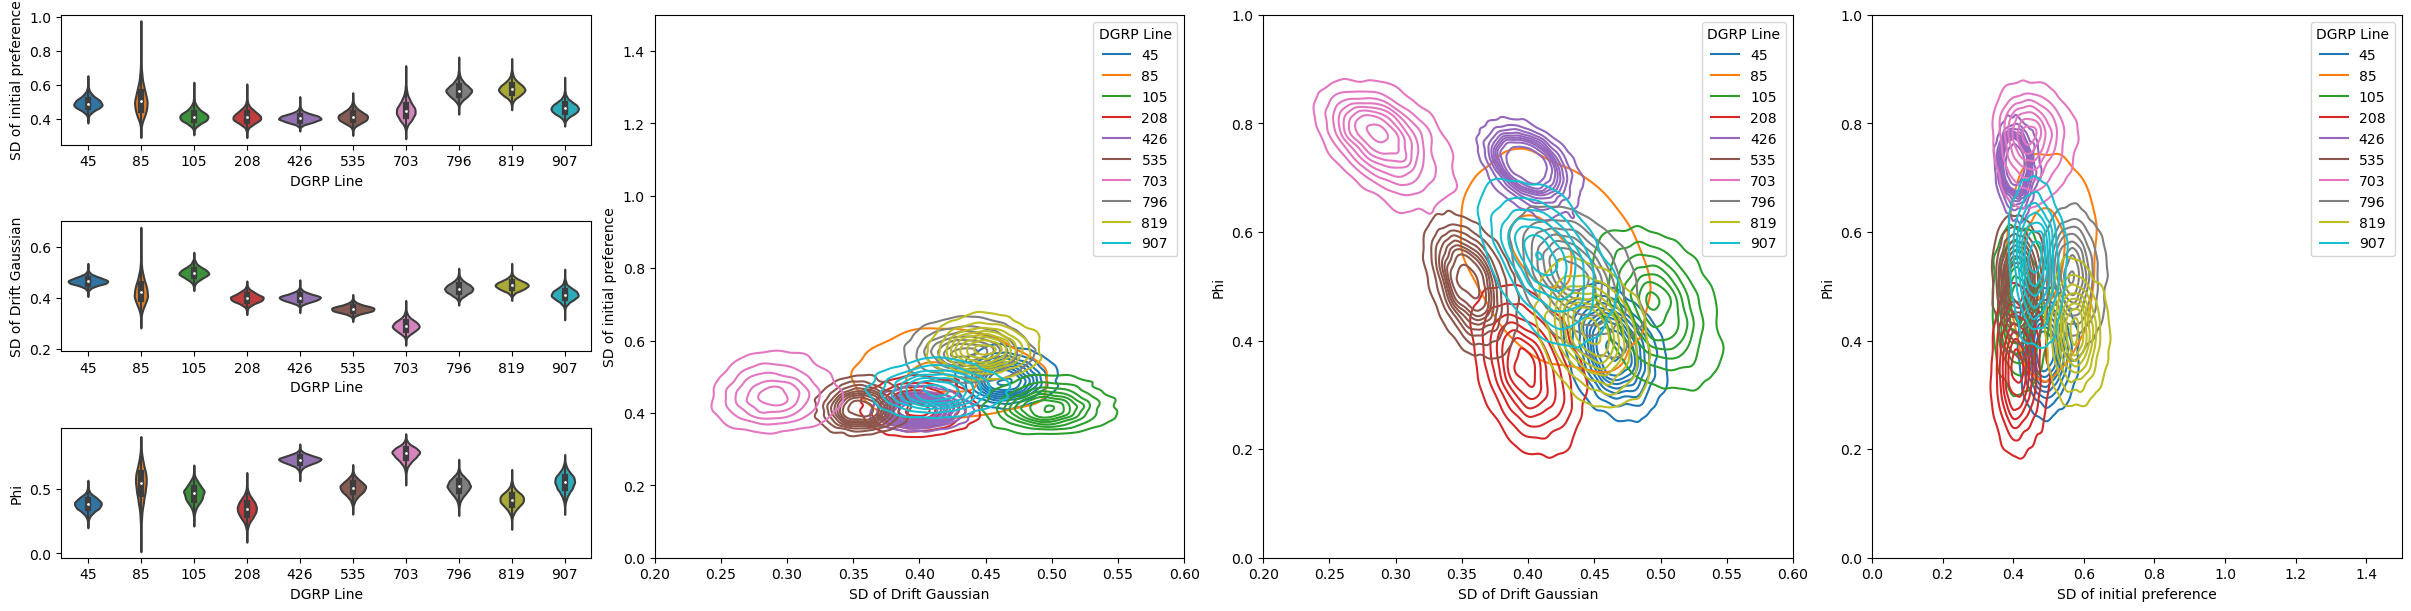

In [57]:
#Showing phi, D, and BH
dlimits=[.2,.6]
bhlimits=[0,1.5]
plimits=[0,1]

mosaic="ADEF;BDEF;CDEF"
# fig, axd=plt.subplot_mosaic([['upper left', 'right'],
#                               ['lower left', 'right']],
#                             figsize=(12, 6), constrained_layout=True)
fig, axd=plt.subplot_mosaic(mosaic,
                            figsize=(24, 6), constrained_layout=True)

BHdes="SD of initial preference"
Ddes="SD of Drift Gaussian"
Pdes="Phi"
fd=fit3.draws_pd()

BH_parameters=fd.loc[:,"BH[1]":"BH[10]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories

bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":BHdes})
sns.violinplot(data=bhpm, x="DGRP Line", y=BHdes, ax=axd["A"])


D_parameters=fd.loc[:,"D[1]":"D[10]"]
D_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
dpm=D_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":Ddes})
sns.violinplot(data=dpm, x="DGRP Line", y=Ddes, ax=axd["B"])

dpm
bhpm[BHdes]
bhd=pd.concat([dpm, bhpm[BHdes]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)

P_parameters=fd.loc[:,"PHI[1]":"PHI[10]"]
P_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
ppm=P_parameters.melt()
ppm=ppm.rename(columns={"variable":"DGRP Line", "value":Pdes})
sns.violinplot(data=ppm, x="DGRP Line", y=Pdes, whis=[.05,.95], ax=axd["C"])

bhd=pd.concat([dpm, bhpm[BHdes], ppm[Pdes]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)


sz=np.ones(bhd_r.shape[0])*.1
bhd_r["Size"]=sz
bhd_r["Size"]
# sp=sns.kdeplot(data=bhd_r, x=BHdes, y=Ddes, hue="DGRP Line",
# Drift and bethedging KDE plot
d_bh=sns.kdeplot(data=bhd_r, x=Ddes, y=BHdes, hue="DGRP Line",
ax=axd["D"],
)
d_bh.set_xlim(dlimits)
d_bh.set_ylim(bhlimits)

#Drift and PHI KDE Plot
d_p=sns.kdeplot(data=bhd_r, x=Ddes, y=Pdes, hue="DGRP Line",
# sizes=sz,=[]
ax=axd["E"],
# alpha=.01,
)
d_p.set_xlim(dlimits)
d_p.set_ylim(plimits)

#BH and PHI KDE Plot
bh_p=sns.kdeplot(data=bhd_r, x=BHdes, y=Pdes, hue="DGRP Line", xlim=[0,.55],
# sizes=sz,=[]
ax=axd["F"],
# alpha=.01,
)
bh_p.set_xlim(bhlimits)
bh_p.set_ylim(plimits)
# sp


In [44]:
fig.savefig("DGRP_model6_AR_transformed_all.pdf")

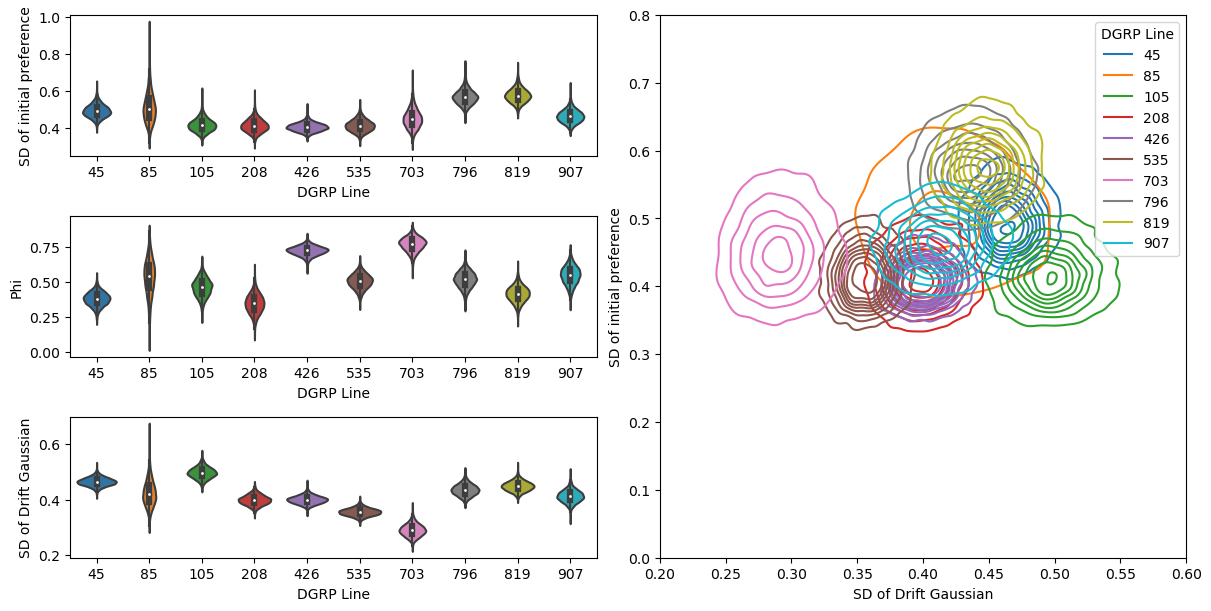

In [62]:
fig, axd=plt.subplot_mosaic([['upper left', 'right'],
                              ['left', 'right'],    
                              ['lower left', 'right']],
                            figsize=(12, 6), constrained_layout=True)

dlimits=[.2,.6]
bhlimits=[0,.8]
plimits=[0,1]

BHdes="SD of initial preference"
Ddes="SD of Drift Gaussian"
fd=fit3.draws_pd()

BH_parameters=fd.loc[:,"BH[1]":"BH[10]"]
BH_parameters.columns=pd.Categorical(skt["LineNumber"]).categories

bhpm=BH_parameters.melt()
bhpm=bhpm.rename(columns={"variable":"DGRP Line", "value":BHdes})
sns.violinplot(data=bhpm, x="DGRP Line", y=BHdes, ax=axd["upper left"])


P_parameters=fd.loc[:,"PHI[1]":"PHI[10]"]
P_parameters.columns=pd.Categorical(skt["LineNumber"]).categories
ppm=P_parameters.melt()
ppm=ppm.rename(columns={"variable":"DGRP Line", "value":Pdes})
sns.violinplot(data=ppm, x="DGRP Line", y=Pdes, whis=[.05,.95], ax=axd["left"])


D_parameters=fd.loc[:,"D[1]":"D[10]"]
D_parameters.columns=pd.Categorical(skt["LineNumber"]).categories


dpm=D_parameters.melt()
dpm=dpm.rename(columns={"variable":"DGRP Line", "value":Ddes})
sns.violinplot(data=dpm, x="DGRP Line", y=Ddes, ax=axd["lower left"])

dpm
bhpm[BHdes]
bhd=pd.concat([dpm, bhpm[BHdes]], axis=1)
bhd=bhd.astype({"DGRP Line": "category"})
bhd_r=bhd.sample(frac=1)


sz=np.ones(bhd_r.shape[0])*.1
bhd_r["Size"]=sz
bhd_r["Size"]
sp=sns.kdeplot(data=bhd_r, x=Ddes, y=BHdes, hue="DGRP Line",
# sizes=sz,=[]
ax=axd["right"],
# alpha=.01,
)
sp.set_xlim(dlimits)
sp.set_ylim(bhlimits)
# sp
fig.savefig("DGRP_STAN_Output.pdf")
